# Text Summarization - Luhn algorithm

# Preparing the environment

In [1]:
import re
import nltk
import string
import heapq

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
original_text = """Artificial intelligence is human like intelligence machines.
                   It is the study of intelligent artificial agents.
                   Science and engineering to produce intelligent machines.
                   Solve problems and have intelligence.
                   Related to intelligent behavior machines.
                   Developing of reasoning machines.
                   Learn from mistakes and successes.
                   Artificial intelligence is related to reasoning in everyday situations."""
original_text = re.sub(r'\s+', ' ', original_text)
original_text

'Artificial intelligence is human like intelligence machines. It is the study of intelligent artificial agents. Science and engineering to produce intelligent machines. Solve problems and have intelligence. Related to intelligent behavior machines. Developing of reasoning machines. Learn from mistakes and successes. Artificial intelligence is related to reasoning in everyday situations.'

In [5]:
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [6]:
stopwords.append('explanation')

In [7]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [8]:
def preprocess(text):
  formatted_text = text.lower()
  tokens = []
  for token in nltk.word_tokenize(formatted_text):
    tokens.append(token)
  tokens = [word for word in tokens if word not in stopwords and word not in string.punctuation]
  formatted_text = ' '.join(element for element in tokens)

  return formatted_text

In [9]:
formatted_text = preprocess(original_text)
formatted_text

'artificial intelligence human like intelligence machines study intelligent artificial agents science engineering produce intelligent machines solve problems intelligence related intelligent behavior machines developing reasoning machines learn mistakes successes artificial intelligence related reasoning everyday situations'

# Function to calculate sentences score

In [10]:
def calculate_sentences_score(sentences, important_words, distance):
  scores = []
  sentence_index = 0

  for sentence in [nltk.word_tokenize(sentence) for sentence in sentences]:
    #print('------------')
    #print(sentence)

    word_index = []
    for word in important_words:
      #print(word)
      try:
        word_index.append(sentence.index(word))
      except ValueError:
        pass

    word_index.sort()
    #print(word_index)

    if len(word_index) == 0:
      continue

    # [0, 1, 5]
    groups_list = []
    group = [word_index[0]]
    i = 1 # 3
    while i < len(word_index): # 3
      # first execution: 1 - 0 = 1
      # second execution: 2 - 1 = 1
      if word_index[i] - word_index[i - 1] < distance:
        group.append(word_index[i])
        #print('group', group)
      else:
        groups_list.append(group[:])
        group = [word_index[i]]
        #print('group', group)
      i += 1
    groups_list.append(group)
    #print('all groups', groups_list)

    max_group_score = 0
    for g in groups_list:
      #print(g)
      important_words_in_group = len(g)
      total_words_in_group = g[-1] - g[0] + 1
      score = 1.0 * important_words_in_group**2 / total_words_in_group
      #print('group score', score)

      if score > max_group_score:
        max_group_score = score

    scores.append((max_group_score, sentence_index))
    sentence_index += 1

  #print('final scores', scores)
  return scores

In [11]:
test = ['a', 'b', 'c']
test.index('a')

0

In [12]:
test = [0,1,3,4,6,9]
test[-1], test[0] + 1

(9, 1)

In [13]:
3*3

9

# Function to summarize the texts

In [14]:
def summarize(text, top_n_words, distance, number_of_sentences, percentage = 0):
  original_sentences = [sentence for sentence in nltk.sent_tokenize(text)]
  #print(original_sentences)
  formatted_sentences = [preprocess(original_sentence) for original_sentence in original_sentences]
  #print(formatted_sentences)
  words = [word for sentence in formatted_sentences for word in nltk.word_tokenize(sentence)]
  #print(words)
  frequency = nltk.FreqDist(words)
  #print(frequency)
  #return frequency
  top_n_words = [word[0] for word in frequency.most_common(top_n_words)]
  #print(top_n_words)
  sentences_score = calculate_sentences_score(formatted_sentences, top_n_words, distance)
  #print(sentences_score)
  if percentage > 0:
    best_sentences = heapq.nlargest(int(len(formatted_sentences) * percentage), sentences_score)
  else:
    best_sentences = heapq.nlargest(number_of_sentences, sentences_score)
  #print(best_sentences)
  best_sentences = [original_sentences[i] for (score, i) in best_sentences]
  #print(best_sentences)
  return original_sentences, best_sentences, sentences_score

In [15]:
original_sentences, best_sentences, sentences_score = summarize(original_text, 5, 2, 3)

In [16]:
original_sentences

['Artificial intelligence is human like intelligence machines.',
 'It is the study of intelligent artificial agents.',
 'Science and engineering to produce intelligent machines.',
 'Solve problems and have intelligence.',
 'Related to intelligent behavior machines.',
 'Developing of reasoning machines.',
 'Learn from mistakes and successes.',
 'Artificial intelligence is related to reasoning in everyday situations.']

In [17]:
best_sentences

['Learn from mistakes and successes.',
 'Related to intelligent behavior machines.',
 'Science and engineering to produce intelligent machines.']

In [18]:
sentences_score

[(2.0, 0), (2.0, 1), (2.0, 2), (1.0, 3), (2.0, 4), (1.0, 5), (3.0, 6)]

In [19]:
from IPython.core.display import HTML

In [20]:
def visualize(title, sentence_list, best_sentences):
  from IPython.core.display import HTML
  text = ''

  display(HTML(f'<h1>Summary - {title}</h1>'))
  for sentence in sentence_list:
    if sentence in best_sentences:
      text += ' ' + str(sentence).replace(sentence, f"<mark>{sentence}</mark>")
    else:
      text += ' ' + sentence
  display(HTML(f""" {text} """))

# Extracting texts from the Internet

In [21]:
!pip install goose3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/88.7 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 9.8 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=01ca7a5fd688fed16c13e6115e11caf3cb6519bc84b5a63834fecc6d2a3989ad
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [22]:
from goose3 import Goose

In [23]:
g = Goose()
url = 'https://en.wikipedia.org/wiki/Automatic_summarization'
article = g.extract(url)

In [24]:
article.cleaned_text

'Automatic summarization is the process of shortening a set of data computationally, to create a subset (a summary) that represents the most important or relevant information within the original content. Artificial intelligence algorithms are commonly developed and employed to achieve this, specialized for different types of data.\n\nText summarization is usually implemented by natural language processing methods, designed to locate the most informative sentences in a given document.[1] On the other hand, visual content can be summarized using computer vision algorithms. Image summarization is the subject of ongoing research; existing approaches typically attempt to display the most representative images from a given image collection, or generate a video that only includes the most important content from the entire collection.[2][3][4] Video summarization algorithms identify and extract from the original video content the most important frames (key-frames), and/or the most important vi

In [25]:
original_sentences, best_sentences, score_sentences = summarize(article.cleaned_text, 300, 10, 120)

In [26]:
len(original_sentences)

303

In [27]:
(120 / len(original_sentences)) * 100

39.603960396039604

In [28]:
original_sentences

['Automatic summarization is the process of shortening a set of data computationally, to create a subset (a summary) that represents the most important or relevant information within the original content.',
 'Artificial intelligence algorithms are commonly developed and employed to achieve this, specialized for different types of data.',
 'Text summarization is usually implemented by natural language processing methods, designed to locate the most informative sentences in a given document.',
 '[1] On the other hand, visual content can be summarized using computer vision algorithms.',
 'Image summarization is the subject of ongoing research; existing approaches typically attempt to display the most representative images from a given image collection, or generate a video that only includes the most important content from the entire collection.',
 '[2][3][4] Video summarization algorithms identify and extract from the original video content the most important frames (key-frames), and/or t

In [29]:
best_sentences

['Automatic summarization is the process of shortening a set of data computationally, to create a subset (a summary) that represents the most important or relevant information within the original content.',
 'The two methods were developed by different groups at the same time, and LexRank simply focused on summarization, but could just as easily be used for keyphrase extraction or any other NLP ranking task.',
 'Some techniques and algorithms which naturally model summarization problems are TextRank and PageRank, Submodular set function, Determinantal point process, maximal marginal relevance (MMR) etc.',
 'For example, if we rank unigrams and find that "advanced", "natural", "language", and "processing" all get high ranks, then we would look at the original text and see that these words appear consecutively and create a final keyphrase using all four together.',
 'Features might include the position in the document (i.e., the first few sentences are probably important), the number of 

In [30]:
score_sentences

[(15.058823529411764, 0),
 (5.444444444444445, 1),
 (8.642857142857142, 2),
 (2.6666666666666665, 3),
 (10.714285714285714, 4),
 (6.666666666666667, 5),
 (6.0, 6),
 (7.0, 7),
 (3.125, 8),
 (9.782608695652174, 9),
 (4.0, 10),
 (7.111111111111111, 11),
 (6.125, 12),
 (1.3333333333333333, 13),
 (11.842105263157896, 14),
 (4.923076923076923, 15),
 (10.227272727272727, 16),
 (5.818181818181818, 17),
 (2.7777777777777777, 18),
 (3.5, 19),
 (4.923076923076923, 20),
 (5.444444444444445, 21),
 (8.470588235294118, 22),
 (3.6, 23),
 (8.333333333333334, 24),
 (6.4, 25),
 (11.529411764705882, 26),
 (4.0, 27),
 (5.0, 28),
 (7.142857142857143, 29),
 (7.0, 30),
 (4.0, 31),
 (7.363636363636363, 32),
 (5.444444444444445, 33),
 (4.5, 34),
 (4.571428571428571, 35),
 (9.0, 36),
 (2.0, 37),
 (5.444444444444445, 38),
 (6.125, 39),
 (13.473684210526315, 40),
 (2.0, 41),
 (4.266666666666667, 42),
 (3.769230769230769, 43),
 (9.307692307692308, 44),
 (7.111111111111111, 45),
 (1.0, 46),
 (9.941176470588236, 47),

In [31]:
visualize(article.title, original_sentences,  best_sentences)

# Extracting articles from RSS feeds

In [32]:
!pip install feedparser

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6047 sha256=7724c7f8c80c7b13ac289ea659b555118d6cde32ddbfc1113bcfd20b069ce961
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built sgmllib3k


In [33]:
import feedparser

In [34]:
from bs4 import BeautifulSoup
import os
import json

In [35]:
url = 'https://www.aitrends.com/feed/'
feed = feedparser.parse(url)

In [36]:
feed.entries

[{'title': 'Best Practices for Building the AI Development Platform in Government',
  'title_detail': {'type': 'text/plain',
   'language': None,
   'base': 'https://www.aitrends.com/feed/',
   'value': 'Best Practices for Building the AI Development Platform in Government'},
  'links': [{'rel': 'alternate',
    'type': 'text/html',
    'href': 'https://www.aitrends.com/ai-world-government/best-practices-for-building-the-ai-development-platform-in-government/'}],
  'link': 'https://www.aitrends.com/ai-world-government/best-practices-for-building-the-ai-development-platform-in-government/',
  'authors': [{'name': 'Allison Proffitt'}],
  'author': 'Allison Proffitt',
  'author_detail': {'name': 'Allison Proffitt'},
  'published': 'Thu, 28 Oct 2021 23:20:17 +0000',
  'published_parsed': time.struct_time(tm_year=2021, tm_mon=10, tm_mday=28, tm_hour=23, tm_min=20, tm_sec=17, tm_wday=3, tm_yday=301, tm_isdst=0),
  'tags': [{'term': 'AI World Government', 'scheme': None, 'label': None},
   {'

In [37]:
for e in feed.entries:
  print(e.title)
  print(e.content[0].value)
  print('-------')

Best Practices for Building the AI Development Platform in Government
<img alt="" class="webfeedsFeaturedVisual wp-post-image" height="70" src="https://www.aitrends.com/wp-content/uploads/2021/10/10-29SoftwareDev-ArmedServices-2-100x70.jpeg" style="float: left; margin-right: 5px;" width="100" /><p><i><span>By John P. Desmond, AI Trends Editor</span></i><span> </span></p>
<p><span>The AI stack defined by Carnegie Mellon University is fundamental to the approach being taken by the US Army for its AI development platform efforts, according to Isaac Faber, Chief Data Scientist at the US Army AI Integration Center, speaking at the </span><a href="https://www.aiworldgov.com/"><span>AI World Government</span></a><span> event held in-person and virtually from Alexandria, Va., last week.</span><span> </span><span> </span></p>
<figure class="wp-caption alignleft" id="attachment_21162" style="width: 168px;"><img alt="" class="size-full wp-image-21162" height="289" src="https://www.aitrends.com/wp

In [38]:
def clean_html(text):
  if text == '':
    return ''
  else:
    return BeautifulSoup(text, 'html5lib').get_text()

In [39]:
e.content[0].value

'<img alt="" class="webfeedsFeaturedVisual wp-post-image" height="70" src="https://www.aitrends.com/wp-content/uploads/2021/10/10-22ForbiddenKnowledge-2-100x70.jpeg" style="float: left; margin-right: 5px;" width="100" /><p><i><span>By Lance Eliot, the AI Trends Insider</span></i><span>\xa0</span><span>\xa0\xa0</span><span>\xa0</span></p>\n<p><span>Are there things that we must not know?\xa0</span><span>\xa0</span><span>\xa0</span></p>\n<p><span>This is an age-old question.\xa0Some assert that there is the potential for knowledge that ought to not be known. In other words, there are ideas, concepts, or mental formulations that should we become aware of that knowledge it could be our downfall. The discovery or invention of some new innovation or way of thinking could be unduly dangerous. It would be best to not go there, as it were, and avoid ever landing on such knowledge: forbidden knowledge.</span><span>\xa0</span><span>\xa0</span><span>\xa0</span></p>\n<p><span>The typical basis for 

In [40]:
clean_html(e.content[0].value)

'By Lance Eliot, the AI Trends Insider\xa0\xa0\xa0\xa0\nAre there things that we must not know?\xa0\xa0\xa0\nThis is an age-old question.\xa0Some assert that there is the potential for knowledge that ought to not be known. In other words, there are ideas, concepts, or mental formulations that should we become aware of that knowledge it could be our downfall. The discovery or invention of some new innovation or way of thinking could be unduly dangerous. It would be best to not go there, as it were, and avoid ever landing on such knowledge: forbidden knowledge.\xa0\xa0\xa0\nThe typical basis for wanting to forbid the discovery or emergence of forbidden knowledge is that the adverse consequences are overwhelming.\xa0The end result is so devastating and undercutting that the bad side outweighs the good that could be derived from the knowledge.\xa0\xa0\xa0\nIt is conceivable that there might be knowledge that is so bad that it has no good possibilities at all. Thus, rather than trying to ba

In [41]:
articles = []
for e in feed.entries:
  articles.append({'title': e.title, 'content': clean_html(e.content[0].value)})

In [42]:
articles

[{'title': 'Best Practices for Building the AI Development Platform in Government',
  'content': 'By John P. Desmond, AI Trends Editor\xa0\nThe AI stack defined by Carnegie Mellon University is fundamental to the approach being taken by the US Army for its AI development platform efforts, according to Isaac Faber, Chief Data Scientist at the US Army AI Integration Center, speaking at the\xa0AI World Government\xa0event held in-person and virtually from Alexandria, Va., last week.\xa0\xa0\nIsaac Faber, Chief Data Scientist, US Army AI Integration Center\n“If we want to move the Army from legacy systems through digital modernization, one of the biggest issues I have found is the difficulty in abstracting away the differences in applications,” he said. “The most important part of digital transformation is the middle layer, the platform that makes it easier to be on the cloud or on a local computer.” The desire is to be able to move your software platform to another platform, with the same

In [43]:
save_file = os.path.join('feed.json')
feed = open(save_file, 'w+')
feed.write(json.dumps(articles, indent=1))
feed.close()

In [44]:
blog_articles = json.loads(open('feed.json').read())
blog_articles

[{'title': 'Best Practices for Building the AI Development Platform in Government',
  'content': 'By John P. Desmond, AI Trends Editor\xa0\nThe AI stack defined by Carnegie Mellon University is fundamental to the approach being taken by the US Army for its AI development platform efforts, according to Isaac Faber, Chief Data Scientist at the US Army AI Integration Center, speaking at the\xa0AI World Government\xa0event held in-person and virtually from Alexandria, Va., last week.\xa0\xa0\nIsaac Faber, Chief Data Scientist, US Army AI Integration Center\n“If we want to move the Army from legacy systems through digital modernization, one of the biggest issues I have found is the difficulty in abstracting away the differences in applications,” he said. “The most important part of digital transformation is the middle layer, the platform that makes it easier to be on the cloud or on a local computer.” The desire is to be able to move your software platform to another platform, with the same

# Word cloud

In [45]:
feed_content = ''
for article in blog_articles:
  feed_content += article['content']

In [46]:
feed_content

'By John P. Desmond, AI Trends Editor\xa0\nThe AI stack defined by Carnegie Mellon University is fundamental to the approach being taken by the US Army for its AI development platform efforts, according to Isaac Faber, Chief Data Scientist at the US Army AI Integration Center, speaking at the\xa0AI World Government\xa0event held in-person and virtually from Alexandria, Va., last week.\xa0\xa0\nIsaac Faber, Chief Data Scientist, US Army AI Integration Center\n“If we want to move the Army from legacy systems through digital modernization, one of the biggest issues I have found is the difficulty in abstracting away the differences in applications,” he said. “The most important part of digital transformation is the middle layer, the platform that makes it easier to be on the cloud or on a local computer.” The desire is to be able to move your software platform to another platform, with the same ease\xa0with\xa0which a new smartphone carries over the user’s contacts and histories.\xa0\xa0\n

In [47]:
formatted_feed_content = preprocess(feed_content)
formatted_feed_content

'john p. desmond ai trends editor ai stack defined carnegie mellon university fundamental approach taken us army ai development platform efforts according isaac faber chief data scientist us army ai integration center speaking ai world government event held in-person virtually alexandria va. last week isaac faber chief data scientist us army ai integration center “ want move army legacy systems digital modernization one biggest issues found difficulty abstracting away differences applications ” said “ important part digital transformation middle layer platform makes easier cloud local computer. ” desire able move software platform another platform ease new smartphone carries user ’ contacts histories ethics cuts across layers ai application stack positions planning stage top followed decision support modeling machine learning massive data management device layer platform bottom “ advocating think stack core infrastructure way applications deployed siloed approach ” said “ need create d

In [48]:
len(feed_content), len(formatted_feed_content)

(102389, 71570)

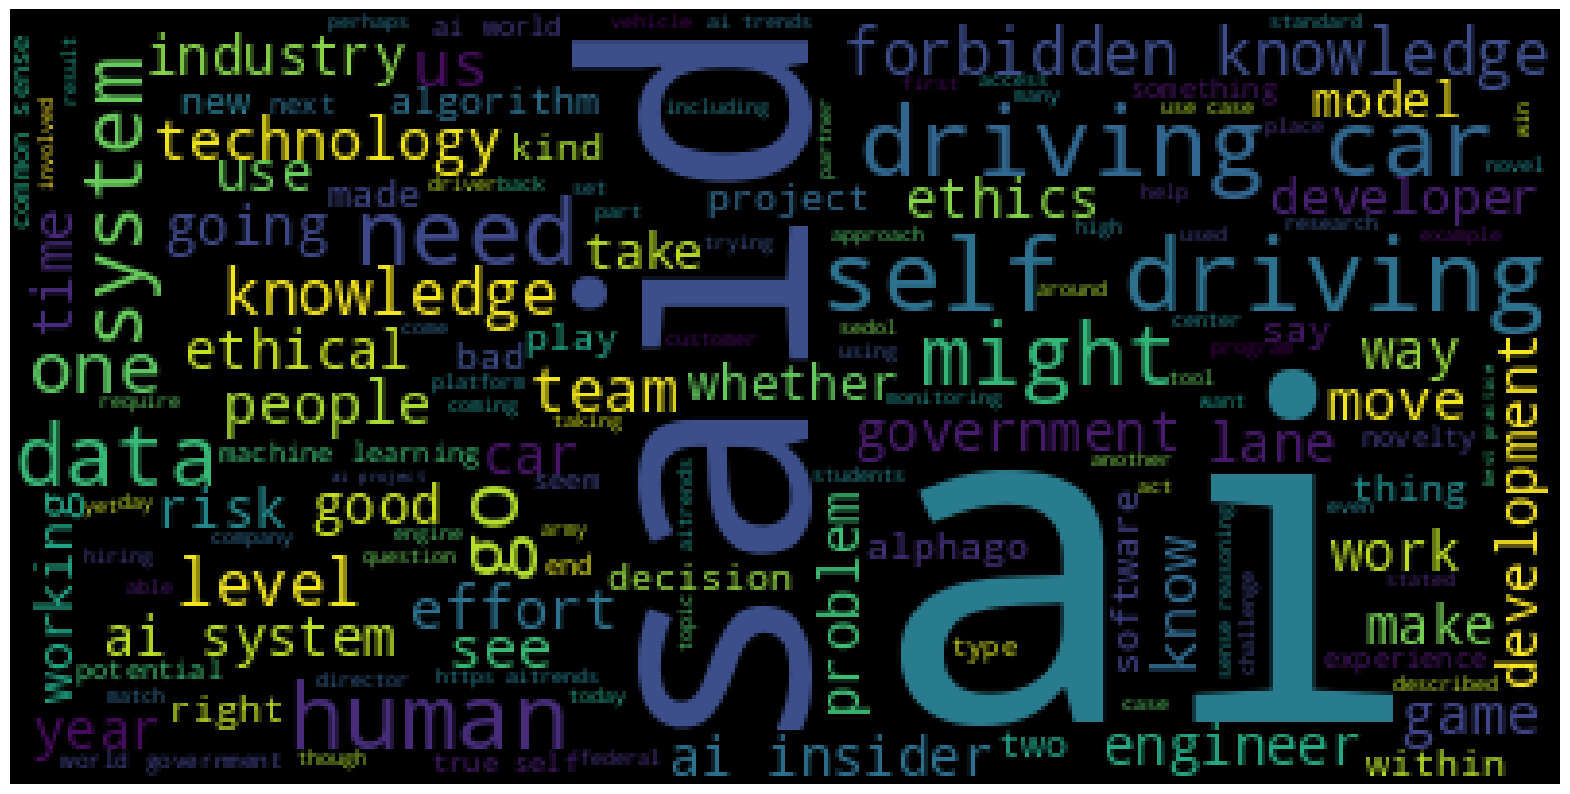

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(WordCloud().generate(formatted_feed_content));

# Extracting named entities

In [50]:
!pip install spacy==2.2.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 13.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [51]:
import spacy

In [52]:
nlp = spacy.load('en_core_web_sm')
nlp

In [53]:
document = nlp(formatted_feed_content)

In [54]:
from spacy import displacy
displacy.render(document, style = 'ent', jupyter = True)

In [55]:
for entity in document.ents:
  if entity.label_ == 'GPE':
    print(entity.text, entity.label_)

alexandria va GPE
south jordan GPE
utah GPE
hamburg germany “ GPE
oakland GPE
calif GPE
california GPE
tenn. GPE
alumina GPE
berkeley GPE
california GPE
san francisco GPE
san francisco GPE
san francisco GPE
ballpark forbidden knowledge GPE


# Summarizing the articles

In [57]:
for article in blog_articles:
  #print(article)
  original_sentences, best_sentences, _ = summarize(article['content'], 150, 10, number_of_sentences=5, percentage=0.5)
  visualize(article['title'], original_sentences, best_sentences)
  # save_summary(article['title'], original_sentences, best_sentences)

# Saving the summary

In [58]:
def save_summary(title, original_sentences, best_sentences):
  HTML_TEMPLATE = """<html>
    <head>
      <title>{0}</title>
      <meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />
    </head>
    <body>{1}</body>

  </html>"""
  text = ''
  for sentence in original_sentences:
    if sentence in best_sentences:
      text += str(sentence).replace(sentence, f"<mark>{sentence}</mark>")
    else:
      text += sentence

  save_file = open(os.path.join(title + '.html'), 'wb')
  html_file = HTML_TEMPLATE.format(title, text)
  save_file.write(html_file.encode('utf-8'))
  save_file.close()